
# LSTM for international airline passengers problem with regression framing

# Importing required libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix

In [3]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility

In [4]:
tf.random.set_seed(7)

# load the dataset

In [17]:
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets

In [7]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1

In [8]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

c:\Users\D MADHAN MOHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
95/95 - 4s - 44ms/step - loss: 0.0425
Epoch 2/100
95/95 - 0s - 4ms/step - loss: 0.0199
Epoch 3/100
95/95 - 0s - 4ms/step - loss: 0.0153
Epoch 4/100
95/95 - 0s - 3ms/step - loss: 0.0140
Epoch 5/100
95/95 - 0s - 3ms/step - loss: 0.0130
Epoch 6/100
95/95 - 0s - 3ms/step - loss: 0.0119
Epoch 7/100
95/95 - 0s - 3ms/step - loss: 0.0109
Epoch 8/100
95/95 - 0s - 5ms/step - loss: 0.0099
Epoch 9/100
95/95 - 0s - 5ms/step - loss: 0.0089
Epoch 10/100
95/95 - 0s - 4ms/step - loss: 0.0080
Epoch 11/100
95/95 - 0s - 4ms/step - loss: 0.0070
Epoch 12/100
95/95 - 0s - 3ms/step - loss: 0.0062
Epoch 13/100
95/95 - 0s - 3ms/step - loss: 0.0054
Epoch 14/100
95/95 - 0s - 3ms/step - loss: 0.0047
Epoch 15/100
95/95 - 0s - 3ms/step - loss: 0.0041
Epoch 16/100
95/95 - 0s - 4ms/step - loss: 0.0036
Epoch 17/100
95/95 - 0s - 3ms/step - loss: 0.0032
Epoch 18/100
95/95 - 0s - 3ms/step - loss: 0.0029
Epoch 19/100
95/95 - 0s - 5ms/step - loss: 0.0026
Epoch 20/100
95/95 - 0s - 5ms/step - loss: 0.0024
Epoch 21

# make predictions

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


# invert predictions

In [12]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error

In [13]:
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.32 RMSE
Test Score: 47.48 RMSE


# shift train predictions for plotting

In [14]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting

In [15]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions

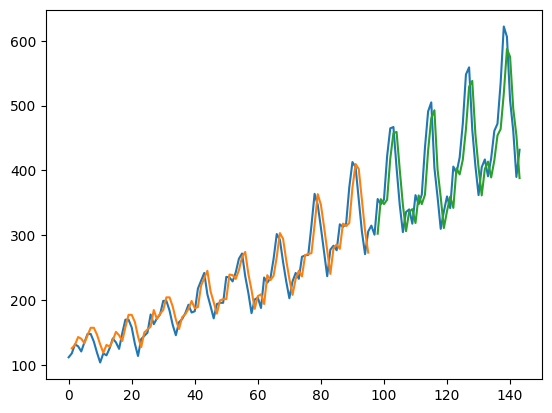

In [ ]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM for international airline passengers problem with window regression framing

Epoch 1/100


c:\Users\D MADHAN MOHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 2s - 27ms/step - loss: 0.0356
Epoch 2/100
92/92 - 0s - 3ms/step - loss: 0.0134
Epoch 3/100
92/92 - 0s - 3ms/step - loss: 0.0095
Epoch 4/100
92/92 - 0s - 3ms/step - loss: 0.0080
Epoch 5/100
92/92 - 0s - 3ms/step - loss: 0.0068
Epoch 6/100
92/92 - 0s - 3ms/step - loss: 0.0057
Epoch 7/100
92/92 - 0s - 3ms/step - loss: 0.0048
Epoch 8/100
92/92 - 0s - 3ms/step - loss: 0.0041
Epoch 9/100
92/92 - 0s - 3ms/step - loss: 0.0037
Epoch 10/100
92/92 - 0s - 3ms/step - loss: 0.0033
Epoch 11/100
92/92 - 0s - 3ms/step - loss: 0.0031
Epoch 12/100
92/92 - 0s - 3ms/step - loss: 0.0030
Epoch 13/100
92/92 - 0s - 3ms/step - loss: 0.0029
Epoch 14/100
92/92 - 0s - 3ms/step - loss: 0.0028
Epoch 15/100
92/92 - 0s - 3ms/step - loss: 0.0027
Epoch 16/100
92/92 - 0s - 3ms/step - loss: 0.0027
Epoch 17/100
92/92 - 0s - 3ms/step - loss: 0.0027
Epoch 18/100
92/92 - 0s - 4ms/step - loss: 0.0026
Epoch 19/100
92/92 - 0s - 3ms/step - loss: 0.0026
Epoch 20/100
92/92 - 0s - 3ms/step - loss: 0.0026
Epoch 21/100
92/92 -

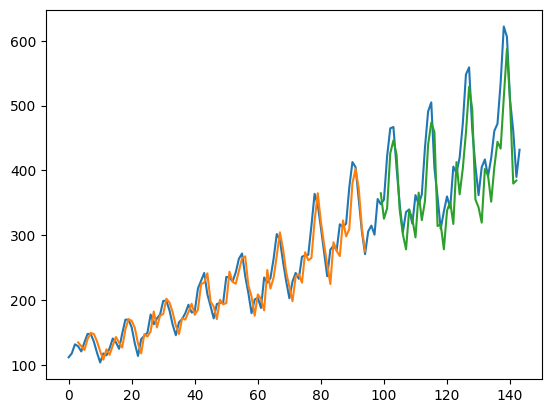

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM for international airline passengers problem with time step regression framing

Epoch 1/100


c:\Users\D MADHAN MOHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 3s - 27ms/step - loss: 0.0375
Epoch 2/100
92/92 - 0s - 3ms/step - loss: 0.0148
Epoch 3/100
92/92 - 0s - 4ms/step - loss: 0.0114
Epoch 4/100
92/92 - 0s - 3ms/step - loss: 0.0099
Epoch 5/100
92/92 - 0s - 4ms/step - loss: 0.0085
Epoch 6/100
92/92 - 0s - 4ms/step - loss: 0.0072
Epoch 7/100
92/92 - 0s - 4ms/step - loss: 0.0061
Epoch 8/100
92/92 - 0s - 4ms/step - loss: 0.0052
Epoch 9/100
92/92 - 0s - 3ms/step - loss: 0.0047
Epoch 10/100
92/92 - 0s - 3ms/step - loss: 0.0045
Epoch 11/100
92/92 - 0s - 3ms/step - loss: 0.0043
Epoch 12/100
92/92 - 0s - 3ms/step - loss: 0.0043
Epoch 13/100
92/92 - 0s - 3ms/step - loss: 0.0042
Epoch 14/100
92/92 - 0s - 4ms/step - loss: 0.0042
Epoch 15/100
92/92 - 0s - 4ms/step - loss: 0.0042
Epoch 16/100
92/92 - 0s - 4ms/step - loss: 0.0041
Epoch 17/100
92/92 - 0s - 4ms/step - loss: 0.0041
Epoch 18/100
92/92 - 0s - 4ms/step - loss: 0.0041
Epoch 19/100
92/92 - 0s - 4ms/step - loss: 0.0041
Epoch 20/100
92/92 - 1s - 6ms/step - loss: 0.0040
Epoch 21/100
92/92 -

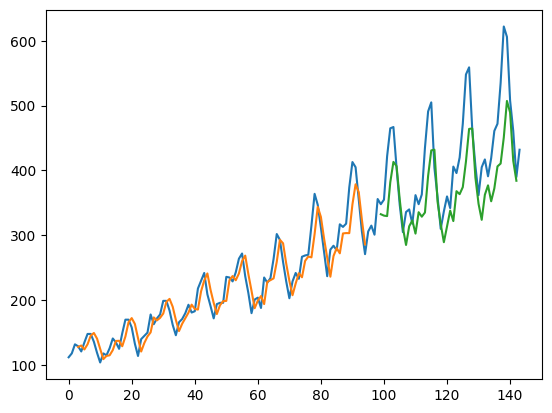

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Stacked LSTM for international airline passengers problem with memory

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (1, 3, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (1, 4)                 │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (1, 1)                 │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (980.00 B)

 Trainable params: 245 (980.00 B)

 Non-trainable params: 0 (0.00 B)

92/92 - 4s - 42ms/step - loss: 0.0053
92/92 - 0s - 3ms/step - loss: 0.0120
92/92 - 0s - 3ms/step - loss: 0.0092
92/92 - 0s - 4ms/step - loss: 0.0075
92/92 - 0s - 3ms/step - loss: 0.0066
92/92 - 0s - 4ms/step - loss: 0.0061
92/92 - 0s - 4ms/step - loss: 0.0059
92/92 - 0s - 4ms/step - loss: 0.0057
92/92 - 0s - 4ms/step - loss: 0.0056
92/92 - 0s - 4ms/step - loss: 0.0055
92/92 - 0s - 3ms/step - loss: 0.0055
92/92 - 0s - 3ms/step - loss: 0.0054
92/92 - 0s - 3ms/step - loss: 0.0054
92/92 - 0s - 3ms/step - loss: 0.0053
92/92 - 0s - 3ms/step - loss: 0.0053
92/92 - 0s - 4ms/step - loss: 0.0052
92/92 - 0s - 3ms/step - loss: 0.0052
92/92 - 0s - 4ms/step - loss: 0.0052
92/92 - 0s - 3ms/step - loss: 0.0052
92/92 - 0s - 4ms/step - loss: 0.0052
92/92 - 0s - 3ms/step - loss: 0.0051
92/92 - 0s - 4ms/step - loss: 0.0051
92/92 - 0s - 3ms/step - loss: 0.0051
92/92 - 0s - 3ms/step - loss: 0.0051
92/92 - 0s - 4ms/step - loss: 0.0051
92/92 - 0s - 3ms/step - loss: 0.0050
92/92 - 0s - 3ms/step - loss: 0.0050


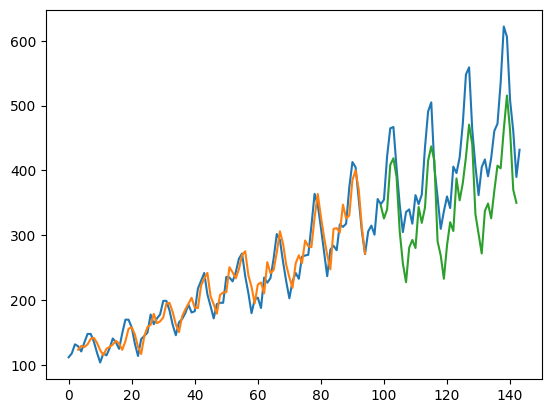

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
look_back = 3
model = Sequential()
model.add(Input(batch_shape=(batch_size, look_back, 1)))
model.add(LSTM(4, stateful=True, return_sequences=True))
model.add(LSTM(4, stateful=True))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	for layer in model.layers:
		if hasattr(layer, 'reset_states'):
			layer.reset_states()
     
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
#model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()